### **Sistem Rekomendasi Buku**

Dataset : https://www.kaggle.com/arashnic/book-recommendation-dataset

# Akses Data ke Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library

In [ ]:
import pandas as pd

# Data Loading

In [ ]:
user = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sistem Rekomendasi/Users.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sistem Rekomendasi/Ratings.csv')
books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sistem Rekomendasi/Books.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data Understanding

In [ ]:
print(user.head())

   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN


In [ ]:
print(ratings.head())

   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6


In [ ]:
print(books.head())

         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/

# Univariate Exploratory Data Analysis

Variabel-variabel pada Book Recommendation dataset adalah sebagai berikut:
* user = merupakan data pengguna
* ratings = merupakan informasi seputar rating buku
* book = merupakan informasi mengenai data rincian buku

Variabel book dan ratings akan digunakan pada model rekomendasi. Sedangkan, variabel user hanya untuk melihat profil pengguna.

## User Variable

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Karena terdapat lebih dari 200.000 data, kami hanya akan mengambil 7.000 data pertama dari variabel user untuk digunakan dalam pembuatan model sistem rekomendasi ini

In [ ]:
user = user[1:7001]
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 1 to 7000
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User-ID   7000 non-null   int64  
 1   Location  7000 non-null   object 
 2   Age       4368 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 164.2+ KB


## Ratings Variable


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Karena terdapat lebih dari 1.000.000 data, kami hanya akan mengambil 7.000 data pertama dari variabel ratings untuk digunakan dalam pembuatan model sistem rekomendasi ini

In [ ]:
ratings = ratings[1:7001]
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 1 to 7000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User-ID      7000 non-null   int64 
 1   ISBN         7000 non-null   object
 2   Book-Rating  7000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 164.2+ KB


In [ ]:
ratings.describe()

,User-ID,Book-Rating
count,7000.000000,7000.000000
mean,277884.521857,2.120286
std,553.995650,3.514075
min,276726.000000,0.000000
25%,277427.000000,0.000000
50%,278074.500000,0.000000
75%,278418.000000,5.000000
max,278418.000000,10.000000


Minimum nilai rating yakni 0 dan maksimumnya yakni 10. Sehingga ratingnya yakni dari skala 0-10.

Melihat berapa pengguna yang memberikan rating, jumlah buku, dan jumlah rating

In [ ]:
print('Jumlah user-ID: ', len(ratings['User-ID'].unique()))
print('Jumlah ISBN: ', len(ratings['ISBN'].unique()))
print('Jumlah data rating buku: ', len(ratings['Book-Rating']))

Jumlah user-ID:  678
Jumlah ISBN:  6600
Jumlah data rating buku:  7000


## Book Variable

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Karena terdapat lebih dari 200.000 data, kami hanya akan mengambil 7.000 data pertama dari variabel books untuk digunakan dalam pembuatan model sistem rekomendasi ini

In [ ]:
books = books[1:7001]
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 1 to 7000
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 7000 non-null   object
 1   Book-Title           7000 non-null   object
 2   Book-Author          7000 non-null   object
 3   Year-Of-Publication  7000 non-null   object
 4   Publisher            7000 non-null   object
 5   Image-URL-S          7000 non-null   object
 6   Image-URL-M          7000 non-null   object
 7   Image-URL-L          7000 non-null   object
dtypes: object(8)
memory usage: 437.6+ KB


Kita akan melihat berapa banyak judul buku yang unik/berbeda satu sama lain dan menampilkan apa saja judul buku tersebut.

In [ ]:
print('Banyak Judul Buku: ', len(books['Book-Title'].unique()))
print('Judul Buku: ', books['Book-Title'].unique())

Banyak Judul Buku:  6750
Judul Buku:  ['Clara Callan' 'Decision in Normandy'
 'Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It'
 ... 'In a Dry Season' 'Cold Blood' 'Critical Mass']


Terdapat 6.750 judul buku yang berbeda seperti terlihat pada output kode.

# Data Preprocessing

Pertama-tama kita hapus dulu ketiga kolom image dalam variabel books dikarenakan kolom tersebut tidak terlalu digunakan

In [ ]:
books = books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
...,...,...,...,...,...
6996,042516988X,Stray Kat Waltz (Kat Colorado Mysteries),Karen Kijewski,1999,Berkley Publishing Group
6997,0380794772,In a Dry Season,Peter Robinson,2000,Avon
6998,0671011375,Death du Jour,Kathy Reichs,2000,Pocket
6999,0515124796,Cold Blood,Lynda LA Plante,1999,Jove Books


Cek apakah ada nilai yang kosong di dalam data ratings.

In [ ]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Hitung jumlah rating kemudian menggabungkannya berdasarkan ISBN

In [ ]:
ratings.groupby('ISBN').sum()

,User-ID,Book-Rating
ISBN,,
0002231115,277962,0
0002232766,277962,0
0002240114,277996,6
000225669X,276912,6
000254794,277399,9
...,...,...
9995585227,277478,0
B0000BLD7X,276762,0
B158991965,276884,6


## Menggabungkan Fitur Ratings dengan Fitur Books

Pertama-tama, kita definisikan variabel all_ratings dengan variabel ratings yang telah kita ketahui sebelumnya.

In [ ]:
all_ratings = ratings
all_ratings

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
...,...,...,...
6996,278418,0590044362,0
6997,278418,0590047922,0
6998,278418,0590059459,0
6999,278418,0590065858,0


Gabungkan dataframe all_ratings dengan books dan memasukkannya ke dalam variabel all_books

In [ ]:
all_books = pd.merge(all_ratings, books[['ISBN','Book-Title','Book-Author']], on='ISBN', how='left')
all_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
0,276726,0155061224,5,NaN,NaN
1,276727,0446520802,0,NaN,NaN
2,276729,052165615X,3,NaN,NaN
3,276729,0521795028,6,NaN,NaN
4,276733,2080674722,0,NaN,NaN
...,...,...,...,...,...
6995,278418,0590044362,0,NaN,NaN
6996,278418,0590047922,0,NaN,NaN
6997,278418,0590059459,0,NaN,NaN
6998,278418,0590065858,0,NaN,NaN


# Data Preparation

## Mengatasi Missing Value

In [ ]:
all_books.isnull().sum()

User-ID           0
ISBN              0
Book-Rating       0
Book-Title     5971
Book-Author    5971
dtype: int64

In [ ]:
len(all_books)

7000

Membersihkan missing value dengan fungsi dropna()

In [ ]:
all_books_clean = all_books.dropna()
all_books_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
9,276746,0425115801,0,Lightning,Dean R. Koontz
10,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL
11,276746,0553561618,0,Dark Paradise,TAMI HOAG
12,276746,055356451X,0,Night Sins,TAMI HOAG
15,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells
...,...,...,...,...,...
6910,278418,0553297988,6,Jedi Search (Star Wars: The Jedi Academy Trilo...,Kevin J. Anderson
6943,278418,055356451X,0,Night Sins,TAMI HOAG
6962,278418,055357230X,0,The Clinic (Alex Delaware Novels (Paperback)),Jonathan Kellerman
6970,278418,0553579754,0,Fear Nothing,DEAN KOONTZ


In [ ]:
all_books_clean.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
Book-Title     0
Book-Author    0
dtype: int64

Urutkan Buku berdasarkan nomor ISBN kemudian memasukkannya ke dalam variabel preparation

In [ ]:
preparation = all_books_clean.sort_values('ISBN', ascending=True)
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
4332,278418,0020418809,0,CADDIE WOODLAWN,Carol Ryrie Brink
4337,278418,0020442408,0,Prince Caspian,C. S. Lewis
4339,278418,0020532105,0,CRY THE BELOVED COUNTRY (Scribner Classic),Alan Paton
3988,278194,0020532105,10,CRY THE BELOVED COUNTRY (Scribner Classic),Alan Paton
1455,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
...,...,...,...,...,...
485,276925,8427007450,0,Desaparecido: LA Autentica Historia De LA Ejec...,Thomas Hauser
347,276875,8806155873,0,Un Giorno Dopo L'altro,Carlo Lucarelli
360,276875,8831760122,0,La Testa Fra Le Nuvole,Tamaro
388,276888,884590184X,0,Siddharta Romanzo Versione Di M Mila,Hermann Hesse


## Mengatasi data duplikat pada variabel preparation

In [ ]:
preparation = preparation.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
4332,278418,0020418809,0,CADDIE WOODLAWN,Carol Ryrie Brink
4337,278418,0020442408,0,Prince Caspian,C. S. Lewis
4339,278418,0020532105,0,CRY THE BELOVED COUNTRY (Scribner Classic),Alan Paton
1455,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
1458,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau
...,...,...,...,...,...
485,276925,8427007450,0,Desaparecido: LA Autentica Historia De LA Ejec...,Thomas Hauser
347,276875,8806155873,0,Un Giorno Dopo L'altro,Carlo Lucarelli
360,276875,8831760122,0,La Testa Fra Le Nuvole,Tamaro
388,276888,884590184X,0,Siddharta Romanzo Versione Di M Mila,Hermann Hesse


## Konversi data series menjadi list

Untuk mengonversi data series menjadi list, kita menggunakan fungsi tolist() dari library numpy.

In [ ]:
# Mengonversi data series 'ISBN' menjadi dalam bentuk list
book_id = preparation['ISBN'].tolist()
 
# Mengonversi data series 'Book-Author' menjadi dalam bentuk list
book_author = preparation['Book-Author'].tolist()
 
# Mengonversi data series 'Book-Title' menjadi dalam bentuk list
book_title = preparation['Book-Title'].tolist()
 
print(len(book_id))
print(len(book_author))
print(len(book_title))

778
778
778


## Membuat dictionary untuk data book_title, book_author, book_id

Membuat dictionary untuk menentukan pasangan key-value pada data book_id, book_author, dan book_title

In [ ]:
book_new = pd.DataFrame({
    'id': book_id,
    'book_author': book_author,
    'book_title': book_title
})
book_new

,id,book_author,book_title
0,0020418809,Carol Ryrie Brink,CADDIE WOODLAWN
1,0020442408,C. S. Lewis,Prince Caspian
2,0020532105,Alan Paton,CRY THE BELOVED COUNTRY (Scribner Classic)
3,002542730X,James Finn Garner,Politically Correct Bedtime Stories: Modern Ta...
4,0030615321,G. B. Trudeau,"Ask for May, Settle for June (A Doonesbury book)"
...,...,...,...
773,8427007450,Thomas Hauser,Desaparecido: LA Autentica Historia De LA Ejec...
774,8806155873,Carlo Lucarelli,Un Giorno Dopo L'altro
775,8831760122,Tamaro,La Testa Fra Le Nuvole
776,884590184X,Hermann Hesse,Siddharta Romanzo Versione Di M Mila


# Model Development dengan Content Based Filtering

### TF-IDF Vectorizer

TF-IDF Vectorizer akan digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap kategori buku. Kita akan menggunakan fungsi tfidfvectorizer() dari library sklearn.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data 'book_title'
tf.fit(book_new['book_title']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '01',
 '101',
 '12',
 '14',
 '1408',
 '1863',
 '1869',
 '1917',
 '1926',
 '1963',
 '1984',
 '1st',
 '24',
 '2nd',
 '3111',
 '40',
 '45',
 '451',
 '50',
 '501',
 '651',
 '835',
 '987',
 '988',
 'abel',
 'about',
 'abrahams',
 'abrechnung',
 'absence',
 'academy',
 'accents',
 'according',
 'account',
 'acres',
 'action',
 'address',
 'adolescent',
 'adventure',
 'adventures',
 'after',
 'again',
 'against',
 'agency',
 'ages',
 'agreements',
 'air',
 'airframe',
 'alex',
 'algernon',
 'alias',
 'alice',
 'alienist',
 'all',
 'along',
 'altars',
 'altro',
 'am',
 'amazing',
 'amazonia',
 'ambitions',
 'america',
 'american',
 'amerika',
 'amp',
 'an',
 'anastasia',
 'anatomist',
 'ancient',
 'and',
 'andromeda',
 'anetka',
 'angel',
 'angela',
 'angels',
 'angesicht',
 'animorphs',
 'animus',
 'anna',
 'anne',
 'anniversary',
 'apart',
 'apes',
 'apprentice',
 'archaeological',
 'are',
 'armageddon',
 'armor',
 'around',
 'arranged',
 'artemis',
 'artemisia',
 'as',
 'ashes',
 'a

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(book_new['book_title']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(778, 1541)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan judul buku
# Baris diisi dengan author buku
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=book_new.book_author
).sample(1541, axis=1).sample(10, axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,express,woodpecker,water,dragonlance,night,george,remedies,101,pandora,search,...,dragons,kremlin,move,harlequin,weep,dirty,someone,etruscan,quidditch,physician
book_author,,,,,,,,,,,,,,,,,,,,,
DEAN KOONTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J. K. Rowling,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Janet Evanovich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dinah L. Moche,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MICHAEL CRICHTON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amy Tan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Patricia Cornwell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Donna Tartt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sue Miller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity

In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.18332102],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.18332102, 0.        ,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa author buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=book_new['book_author'], columns=book_new['book_author'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap author buku
cosine_sim_df.sample(7, axis=1).sample(10, axis=0)

Shape: (778, 778)


book_author,JANE SMILEY,Sharon Creech,Janet Evanovich,Kathy Reichs,Stephen King,Mercedes Lackey,Dean R. Koontz
book_author,,,,,,,
Robert James Waller,0.000000,0.0,0.000000,0.0,0.058149,0.088307,0.041018
ANNE TYLER,0.367848,0.0,0.061699,0.0,0.000000,0.000000,0.000000
Sidney Sheldon,0.000000,0.0,0.000000,0.0,0.000000,0.031343,0.041965
Kathy Hepinstall,0.000000,0.0,0.000000,0.0,0.070031,0.106351,0.049399
Carol Ryrie Brink,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
Carolyn Keene,0.000000,0.0,0.000000,0.0,0.000000,0.019108,0.025583
Danielle Steel,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
Marilyn French,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
Rebecca Wells,0.000000,0.0,0.062547,0.0,0.041774,0.085448,0.058934


### Mendapatkan Rekomendasi

In [ ]:
def book_recommendations(nama_author, similarity_data=cosine_sim_df, items=book_new[['book_author', 'book_title']], n=10):
    
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_author].to_numpy().argpartition(
        range(-1, -n, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(n+2):-1]]
    
    # Drop nama_author agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_author, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(n)

In [ ]:
book_new[book_new.book_author.eq('Peter Carey')]

,id,book_author,book_title
205,0375410848,Peter Carey,True History of the Kelly Gang


In [ ]:
# Mendapatkan rekomendasi buku yang mirip dengan buku dari author Kate White
book_recommendations('Peter Carey')

,book_author,book_title
0,DONNA TARTT,Secret History
1,Jostein Gaarder,Sophie's World: A Novel About the History of P...
2,Sebastian Junger,The Perfect Storm: A True Story of Men Against...
3,Adeline Yen Mah,Falling Leaves: The True Story of an Unwanted ...
4,Wally Lamb,I Know This Much Is True
5,Wally Lamb,She's Come Undone (Oprah's Book Club (Paperback))
6,Wally Lamb,She's Come Undone (Oprah's Book Club)
7,Marc Levy,If Only It Were True
8,Stan Redding,Catch Me If You Can: The True Story of a Real ...
9,WILLIAM GOLDMAN,The Princess Bride: S Morgenstern's Classic Ta...


## Evaluasi

### 1. Precision pada Top-N

Precision pada Top-N merupakan proporsi item yang direkomendasikan dalam set    Top-N yang relevan. Berikut rumusnya :
    
* Precision = ((k of recommendation that are relevant) / (k of item we recommend)) . 100 %
* Pada contoh rekomendasi buku dapat kita simpulkan bahwa :
* k of recommendation that are relevant = 8 buku
* k of item we recommend = 10 buku
* Precision = ((8)/(10)) . 100 %
* Jadi presisinya = 80%

### 2. Recall


Recall pada Top-N, merupakan proporsi item relevan yang ditemukan di rekomendasi top-N. Berikut rumusnya :
* Recall = (k of recommendation that are relevant) / (total k of relevant items)
* Pada contoh rekomendasi buku dapat kita simpulkan bahwa :
* a. Pada recall@6
    * k of recommendation that are relevant = 5 buku
    * total k of relevant items = 8 buku
    * Recall @ 6 = (5)/(8)
    * Jadi presisinya = 5/8
        
* b. Pada recall@10
    * k of recommendation that are relevant = 8 buku
    * total k of relevant items = 8 buku
    * Recall @ 10 = (8)/(8)
    * Jadi presisinya = 8/8

# Model Development dengan Collaborative Filtering

### Import Library

In [ ]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

## Data Understanding

### Data Loading

In [ ]:
# Membaca dataset
df = ratings
df

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
...,...,...,...
6996,278418,0590044362,0
6997,278418,0590047922,0
6998,278418,0590059459,0
6999,278418,0590065858,0


## Data Preparation

Melakukan persiapan data untuk menyandikan (encode) fitur 'User-ID' dan 'ISBN' ke dalam indeks integer.

In [ ]:
# Mengubah User-ID menjadi list tanpa nilai yang sama
user_ids = df['User-ID'].unique().tolist()
print('list User-ID: ', user_ids)
 
# Melakukan encoding User-ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User-ID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User-ID: ', user_encoded_to_user)

list User-ID:  [276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 277040, 

In [ ]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
book_ids = df['ISBN'].unique().tolist()
 
# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
 
# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}
 
# Selanjutnya, petakan User-ID dan ISBN ke dataframe yang berkaitan.
 
# Mapping User-ID ke dataframe user
df['user'] = df['User-ID'].map(user_to_user_encoded)
 
# Mapping ISBN ke dataframe buku
df['book'] = df['ISBN'].map(book_to_book_encoded)

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah buku
num_book = len(book_encoded_to_book)
print(num_book)
 
# Mengubah rating menjadi nilai float
df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['Book-Rating'])
 
# Nilai maksimal rating
max_rating = max(df['Book-Rating'])
 
print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

678
6600
Number of User: 678, Number of Book: 6600, Min Rating: 0.0, Max Rating: 10.0


### Membagi Data untuk Training dan Validasi

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,book
6501,278418,0446364304,0.0,677,6123
2945,277879,0380710056,6.0,453,2800
2025,277478,0146000552,0.0,272,1961
264,276856,2800135719,0.0,53,262
4351,278418,003021436X,0.0,677,4051
...,...,...,...,...,...
3773,278160,044022425X,8.0,574,3549
5192,278418,0373074174,0.0,677,4870
5227,278418,0373079729,0.0,677,4904
5391,278418,0373122322,0.0,677,5066


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'book']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 677 6123]
 [ 453 2800]
 [ 272 1961]
 ...
 [ 677 4904]
 [ 677 5066]
 [ 138  850]] [0.  0.6 0.  ... 0.  0.  0.8]


## Proses Training

In [ ]:
class RecommenderNet(tf.keras.Model):
  
  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_book, 50)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
700/700 [==============================] - 5s 6ms/step - loss: 0.6330 - root_mean_squared_error: 0.4202 - val_loss: 0.5818 - val_root_mean_squared_error: 0.3903
Epoch 2/100
700/700 [==============================] - 4s 5ms/step - loss: 0.4626 - root_mean_squared_error: 0.3231 - val_loss: 0.5413 - val_root_mean_squared_error: 0.3663
Epoch 3/100
700/700 [==============================] - 4s 5ms/step - loss: 0.4337 - root_mean_squared_error: 0.3095 - val_loss: 0.5101 - val_root_mean_squared_error: 0.3488
Epoch 4/100
700/700 [==============================] - 4s 5ms/step - loss: 0.4113 - root_mean_squared_error: 0.2961 - val_loss: 0.4822 - val_root_mean_squared_error: 0.3342
Epoch 5/100
700/700 [==============================] - 4s 5ms/step - loss: 0.3897 - root_mean_squared_error: 0.2832 - val_loss: 0.4611 - val_root_mean_squared_error: 0.3243
Epoch 6/100
700/700 [==============================] - 3s 5ms/step - loss: 0.3728 - root_mean_squared_error: 0.2727 - val_loss: 0.4455 

In [ ]:
book_df = book_new
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sistem Rekomendasi/Ratings.csv')
df = data[1:7001]

# Mengambil sample user
user_id = df['User-ID'].sample(100).iloc[30]
book_visited_by_user = df[df['User-ID'] == user_id]
 
# Operator bitwise (~)
book_not_visited = book_df[~book_df['id'].isin(book_visited_by_user.ISBN.values)]['id'] 
book_not_visited = list(
    set(book_not_visited)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_not_visited = [[book_to_book_encoded.get(x)] for x in book_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_visited), book_not_visited)
)

In [ ]:
rating = model.predict(user_book_array).flatten()
 
top_rating_indices = rating.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_visited[x][0]) for x in top_rating_indices
]
 
print('Menampilkan Rekomendasi  Book_Author untuk Pengguna dengan Total : {} Pengguna'.format(user_id))
print('===' * 11)
top_book_user = (
    book_visited_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = book_df[book_df['id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.book_author, ':', row.book_title)
 
print('---' * 11)
print('Top 10 Book_Author Recommendation')
print('---' * 11)
 
recommended_book = book_df[book_df['id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.book_author, ':', row.book_title)

Menampilkan Rekomendasi  Book_Author untuk Pengguna dengan Total : 277565 Pengguna
---------------------------------
Top 10 Book_Author Recommendation
---------------------------------
Douglas Adams : Restaurant At the End of the Universe
John Grisham : The Rainmaker
William Gerald Golding : Lord of the Flies
J.D. Robb : Purity in Death
CHRISTOPHER PAUL CURTIS : The Watsons Go to Birmingham - 1963 (Yearling Newbery)
Nora Roberts : Dance upon the Air (Three Sisters Island Trilogy)
LAURIE R. KING : The Beekeeper's Apprentice
Catherine Ryan Hyde : Pay It Forward
Jack Canfield : Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series (Paper))
Carlos Ruiz Zafon : La Sombra del Viento


## Evaluasi

### 1. Metrik Root Mean Squared Error (RMSE)

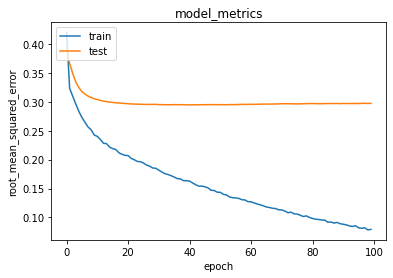

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 2. Mean Squared Error (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE dari pada data train = ", mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3)
print("MSE dari pada data validation = ", mean_squared_error(y_true=y_val, y_pred=model.predict(x_val))/1e3)

MSE dari pada data train =  3.2286864941625425e-05
MSE dari pada data validation =  8.857671169655306e-05
